In [185]:
import numpy as np
import matplotlib.pyplot as plt

np.pi

3.141592653589793

In [186]:
# https://levelup.gitconnected.com/generating-the-value-of-pi-to-a-known-number-of-decimals-places-in-python-e93986bb474d

In [187]:
import decimal
import math

def compute_pi(n):
  """
  This function calculates the value of pi to 'n' number of decimal places
  Args:
  n:   precision(Decimal places)
  Returns:
  pi:   the value of pi to n-decimal places
  """
  
  decimal.getcontext().prec = n + 3
  decimal.getcontext().Emax = 999999999
  
  C = 426880 * decimal.Decimal(10005).sqrt()
  K = decimal.Decimal(6)
  M = decimal.Decimal(1)
  X = decimal.Decimal(1)
  L = decimal.Decimal(13591409)
  S = L
  
  # For better precision, we calculate to n+3 and truncate the last two digits
  for i in range(1, n+3):
    M = decimal.Decimal(M* ((1728*i*i*i)-(2592*i*i)+(1104*i)-120)/(i*i*i))
    L = decimal.Decimal(545140134+L)
    X = decimal.Decimal(-262537412640768000*X)
    S += decimal.Decimal((M*L) / X)
    
  return str(C/S)[:-2] # Pi is C/S

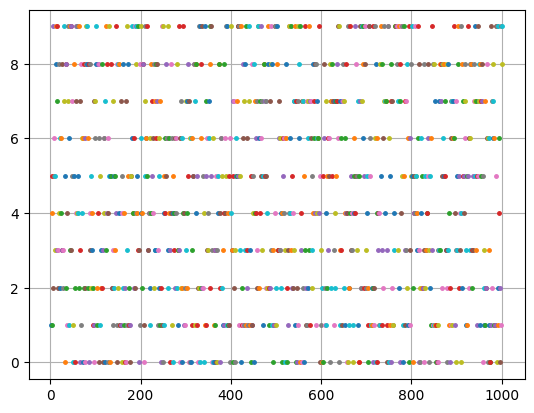

In [188]:
n = 1000
bin = np.zeros(10)
pi = compute_pi(n)
#print(pi)

for i in range(2,n+2):
    #print(f'{pi[i]} ',end='')
    plt.plot(i,int(pi[i]),'.',markersize=5)
    bin[int(pi[i])]+=1
plt.grid()


In [189]:
bin,max(bin),min(bin)


(array([ 93., 116., 103., 102.,  93.,  97.,  94.,  95., 101., 106.]),
 116.0,
 93.0)

In [190]:
from pylab import sign, diff
def plot_data(x,data,lw=3):
    # find the indexes of maximas and the minimas
    #a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    print(b,len(b),c,len(c))
    # plot the curve
    plt.plot(x,data,lw=lw)
    #plot the maximas
    for v in b:
        plt.plot(x[v], data[v], "ob")
    #plot the minimas
    for v in c:
        plt.plot(x[v], data[v], "or")
    plt.grid()

[4 6] 2 [1 5] 2


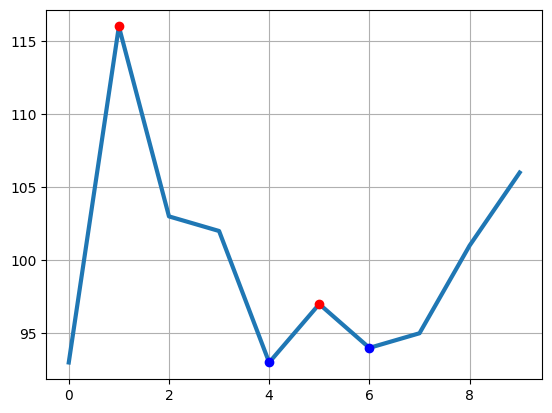

In [191]:
plot_data(x,bin)

In [192]:
def radial_plot(radius,theta,mks=5):
    plt.plot(radius*np.cos(theta),radius*np.sin(theta),marker=".", markersize=mks,lw=0) 

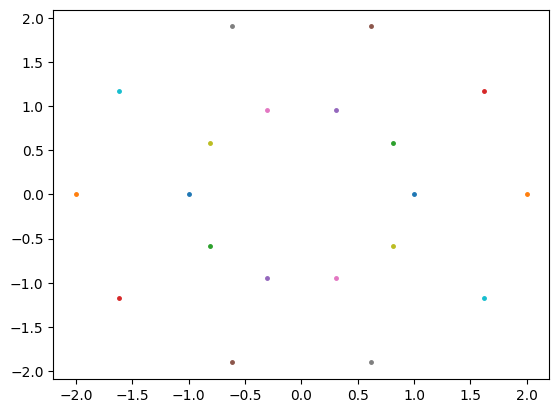

In [193]:
# rotation coord. cartésien
a = 2
for k in x:
    radial_plot(1,k*np.pi/5)
    radial_plot(a,k*np.pi/5)


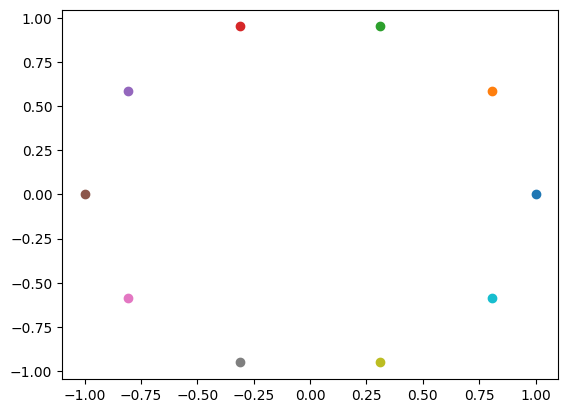

In [194]:
# rotation par valeur complexe k*saut*1j
# np.exp(k*saut*1j).real = cos(k*saut)
# np.exp(k*saut*1j).imag = sin(k*saut)
a = 1   # amplitude
saut = np.pi/5
#plt.plot(a,0,'bo')
for k in x:
    plt.plot(a*np.exp(k*saut*1j).real, a*np.exp(k*saut*1j).imag,'o')


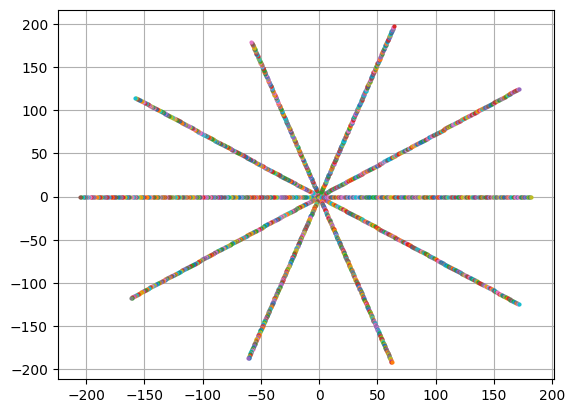

In [209]:
n = 2000
bin = np.ones(10)
pi = compute_pi(n)
for i in range(2,n+2):
    k = int(pi[i])
    #plt.plot(i,k,'.',markersize=5)
    plt.plot(bin[k]*np.exp(1j*k*np.pi/5).real, bin[k]*np.exp(1j*k*np.pi/5).imag,'o',markersize=2)
    bin[k]+=1
plt.grid()

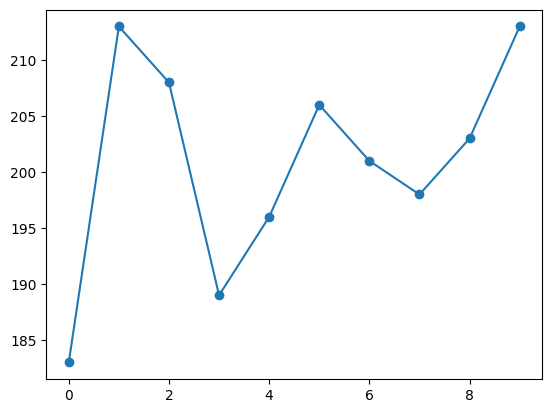

In [210]:
x= [i for i in range(10)]
plt.scatter(x,bin)
plt.plot(x,bin)

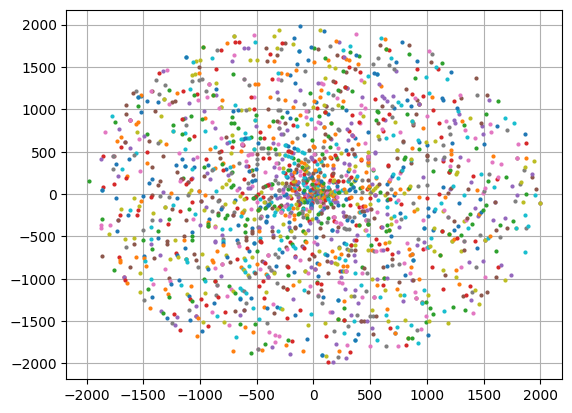

In [211]:
for i in range(2,n+2):
    k += int(pi[i])
    #plt.plot(i,k,'.',markersize=5)
    plt.plot(i*np.exp(1j*k).real, i*np.exp(1j*k).imag,'o',markersize=2)
    #bin[k]+=1
plt.grid()